In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Read Data

In [3]:
 harold_portfolio_path = Path("../Pandas/harold_portfolio.csv")
my_portfolio_path = Path("../Pandas/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')


harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


##  Calculate daily returns

In [4]:
daily_return1 = harold_portfolio.pct_change()
daily_return1.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557


In [5]:
daily_return = my_portfolio.pct_change()
daily_return.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709


##  Concat portfolios into one DataFrame

In [6]:
our_portfolio = pd.concat([daily_return1, daily_return], axis="columns", join="inner")
our_portfolio = our_portfolio.dropna()
our_portfolio.sort_index()
our_portfolio



,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


In [7]:
all_portfolio_std = our_portfolio.std()
all_portfolio_std.head()

BTC     0.070488
BTT     0.030731
DOGE    0.050907
ETH     0.091517
LTC     0.084703
dtype: float64

##  Calculate sharpe ratio for all data

In [8]:
#sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharp_ratios = (our_portfolio.mean() * 252) / (our_portfolio.std() * np.sqrt(252))
sharp_ratios

BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
BTC      -0.671876
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
XLM       0.937406
dtype: float64

##  Plot Sharpe Ratios

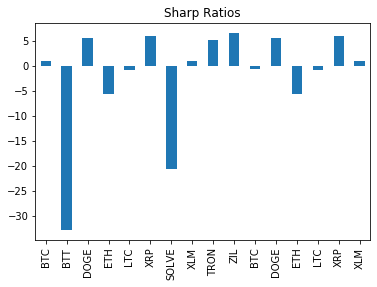

In [9]:
sharp_ratios.plot(kind = 'bar', title = 'Sharp Ratios')

##  How many smart investments did Harold make compared to risky investments? How many did you make?

##  Which cryptos have been the smartest investment?

##  Calculate annualized std dev for each portfolio individually

In [10]:
 # Calculate std dev for all investments for each portfolio
annualized_std_H = daily_return1.pct_change().dropna()
annualized_std_Me = daily_return.pct_change().dropna()

all_Portfolios_returns = pd.concat([annualized_std_H,annualized_std_Me], axis ='columns', join = 'inner')
all_Portfolios_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-18,-12.374447,-0.459425,-2.208337,-1.435366,-1.421343,-3.175138,-0.622640,-3.040543,-4.111492,-2.183146,-1.121978,-2.208337,-1.435366,-1.421343,-3.175138,-3.040543
2019-05-17,-1.121978,-0.392318,-0.737136,0.794048,0.752028,-1.335387,1.294966,-0.802875,-1.176577,-1.151099,4.017102,-0.737136,0.794048,0.752028,-1.335387,-0.802875
2019-05-16,4.017102,1.075235,-5.860245,-1.719063,0.041039,1.403671,0.426259,-5.805537,3.063286,2.977597,-0.411673,-5.860245,-1.719063,0.041039,1.403671,-5.805537
2019-05-15,-0.411673,-0.504379,-0.364580,1.177429,-2.520292,-0.003414,-1.053206,-1.024163,0.435364,0.894969,-1.628936,-0.364580,1.177429,-2.520292,-0.003414,-1.024163


## Calculate the sharpe ratios for each individual portfolio

In [11]:
 # Calculate sharpe ratio
sharpe_ratios_H = (daily_return1.mean() * 252) / (annualized_std_H)
sharpe_ratios_Me = (daily_return.mean() * 252) / (annualized_std_Me)

sharpe_ratios_Me

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-18,0.399699,0.010189,0.254222,0.200311,0.082221,0.040659
2019-05-17,-0.111636,0.030523,-0.459546,-0.378591,0.195495,0.153979
2019-05-16,1.089346,0.003839,0.212268,-6.937505,-0.185985,0.021294
2019-05-15,0.275305,0.061714,-0.309914,0.112967,76.459561,0.120709
2019-05-14,2.268007,0.008517,1.516871,0.484663,0.119189,-0.001461
...,...,...,...,...,...,...
2016-08-28,0.131814,-0.011325,-0.054908,0.128472,0.252101,0.105132
2016-08-27,0.152770,0.013571,0.553460,0.560525,0.007677,-0.019135
2016-08-26,0.340357,0.002791,0.961714,0.284711,0.200611,0.133006


##  Average sharpe ratios for each portfolio and output to screen

In [12]:
 # Averaging sharpe ratios
H_sharpe_avg = sharpe_ratios_H.mean()
my_sharpe_avg = sharpe_ratios_Me.mean()
H_sharpe_avg

BTC       -0.826168
BTT       23.210210
DOGE      -5.358463
ETH       -1.700254
LTC       -6.588477
XRP     -558.678846
SOLVE     -2.731816
XLM       -0.666838
TRON       2.012570
ZIL        0.214217
dtype: float64

## Compare Sharpe Ratios Averages

In [13]:
 # Use comparison operator to determine if Harold's sharpe ratio avg is greater
    
H_sharpe_avg = sharpe_ratios_H.mean()
my_sharpe_avg = sharpe_ratios_Me.mean()

print ("Harold's sharp ratio average:",H_sharpe_avg)
print ("My sharp ratio average:",my_sharpe_avg)


Harold's sharp ratio average: BTC       -0.826168
BTT       23.210210
DOGE      -5.358463
ETH       -1.700254
LTC       -6.588477
XRP     -558.678846
SOLVE     -2.731816
XLM       -0.666838
TRON       2.012570
ZIL        0.214217
dtype: float64
My sharp ratio average: BTC     0.622206
DOGE    0.003333
ETH     0.009643
LTC     0.028072
XRP     0.339981
XLM     0.031755
dtype: float64


In [21]:
# Use comparison operator to determine if Harold's sharpe ratio avg is greater
H_sharpe_avg > my_sharpe_avg

ValueError: Can only compare identically-labeled Series objects

## Which portfolio is the smartest investment, based off of risk to reward ratio?